In [ ]:
# GOOGLE DRIVE - COLAB
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/DS_thesis")
print(os.getcwd())

/content/drive/MyDrive/DS_thesis


In [ ]:
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=59eda850728bd5fa283b54e74336111b0963cf797ec449aea2fc6167c25918e4
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [ ]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


In [ ]:
import feather
import math
import ta
# import talib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# from talib import abstract
from boruta import BorutaPy

In [ ]:
df = pd.read_feather("raw_data/daily_us.feather").sort_values(['permno', 'date'])
df_indexed = df.set_index(['permno', 'date'])
df_indexed

ticker     close       low     high    volume       ret  \
permno date                                                               
10107  20000103   MSFT  116.5625  112.0000  118.625  26937123 -0.001606   
       20000104   MSFT  112.6250  112.2500  117.125  27531141 -0.033780   
       20000105   MSFT  113.8125  109.3750  116.375  32708345  0.010544   
       20000106   MSFT  110.0000  108.3750  113.875  27997348 -0.033498   
       20000107   MSFT  111.4375  107.3125  112.250  31415665  0.013068   
...                ...       ...       ...      ...       ...       ...   
91556  20211227   ROST  112.3700  110.3750  113.130   1648036  0.020062   
       20211228   ROST  112.1600  111.8350  113.400   1137226 -0.001869   
       20211229   ROST  113.3100  112.2300  114.000   1394263  0.010253   
       20211230   ROST  114.2700  113.4000  114.930    858921  0.008472   
       20211231   ROST  114.2800  113.7700  115.100   1130667  0.000088   

                      bid       ask      open   numtrd     spret  
permno date                                                       
10107  20000103  116.5000  116.5625  117.3750  31517.0 -0.009549  
       20000104  112.6250  112.6875  113.5625  31294.0 -0.038345  
       20000105  113.7500  113.8125  111.1250  40376.0  0.001922  
       20000106  109.9375  110.0000  112.1875  32595.0  0.000956  
       20000107  111.4375  111.5000  108.6250  36659.0  0.027090  
...                   ...       ...       ...      ...       ...  
91556  20211227  112.3600  112.3800  110.6200  25288.0  0.013839  
       20211228  112.1600  112.2100  111.9700  20184.0 -0.001010  
       20211229  113.3100  113.3700  112.2300  18557.0  0.001402  
       20211230  114.2700  114.3100  113.4100  20034.0 -0.002990  
       20211231  114.2800  114.3200  114.2700  17159.0 -0.002626  

[442800 rows x 11 columns]

In [ ]:
for ticker in df.ticker.unique():
  data = df.iloc[list(np.where(df['ticker'] == ticker)[0])].reset_index().drop(columns = ['index'])
  data.to_feather('./stock_data/df_{}.feather'.format(ticker))
  print(ticker, ' finished')

MSFT  finished
ASTE  finished
HTLD  finished
PLAB  finished
IIVI  finished
AMSWA  finished
AMGN  finished
APOG  finished
AMAT  finished
CTAS  finished
CMTL  finished
CBRL  finished
FFBC  finished
FMBI  finished
GNTX  finished
JBHT  finished
KLIC  finished
LANC  finished
NTRS  finished
SEIC  finished
CGNX  finished
LSCC  finished
IMGN  finished
HOLX  finished
REGN  finished
IDXX  finished
PRGS  finished
ZBRA  finished
AAON  finished
SCHL  finished
SNPS  finished
NBTB  finished
KOPN  finished
BBBY  finished
SBUX  finished
WIRE  finished
LFUS  finished
UMBF  finished
UEIC  finished
INTU  finished
LSTR  finished
SCVL  finished
CHDN  finished
SANM  finished
ATVI  finished
FWRD  finished
UFPI  finished
HAIN  finished
PENN  finished
ADTN  finished
HLIT  finished
SBGI  finished
IART  finished
ERIE  finished
MYGN  finished
POOL  finished
CSGS  finished
CENX  finished
JAKK  finished
NBIX  finished
ANSS  finished
GERN  finished
OCFC  finished
VSAT  finished
CERS  finished
EEFT  finished
GIFI  fin

In [ ]:
#ASTE, CENX, GIFI, HOLX, IBOC, NTRS, PRGS

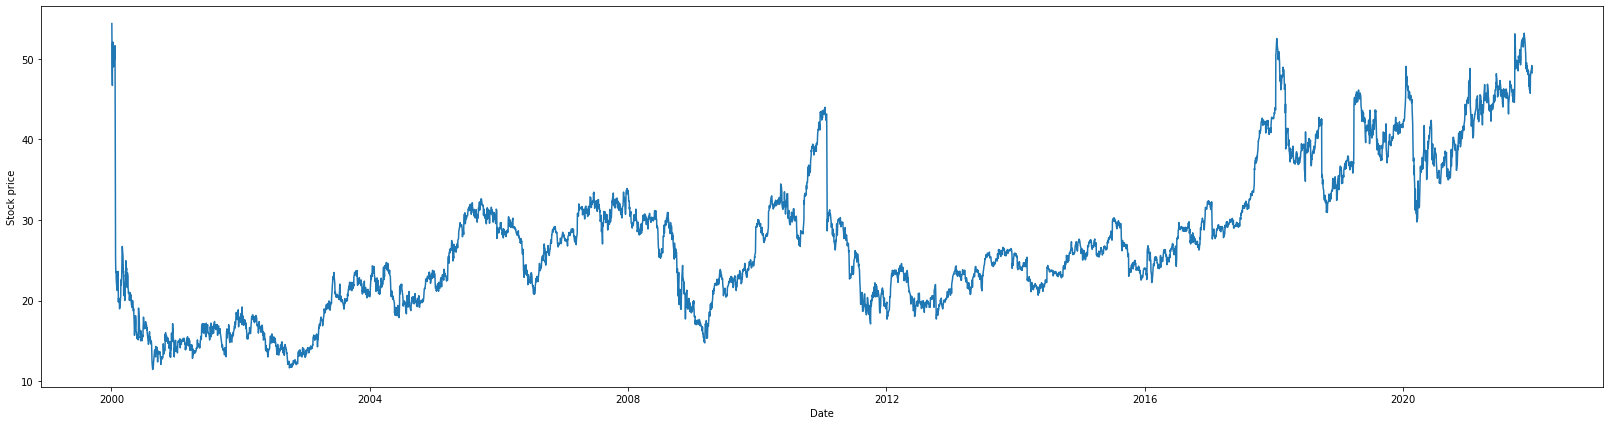

In [ ]:
#Load and plot
stock = 'PRGS'
adf = pd.read_feather(f'stock_data/df_{stock}.feather')
plotdata = adf[['date','close']]
datetime_series = pd.to_datetime(plotdata['date'].astype(str), format='%Y%m%d')
datetime_index = pd.DatetimeIndex(datetime_series.values)
plotdata = plotdata.set_index(datetime_index)
plotdata = plotdata.sort_values(by='date')
plotdata = plotdata.drop(columns='date')
plotdata
plt.figure(figsize=(28, 7))
plt.plot(plotdata)
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.show()

In [ ]:
#ASTE, CENX, GIFI, HOLX, IBOC, NTRS, PRGS
df_ASTE = pd.read_feather('stock_data/df_CENX.feather')
df_ASTE_raw = df_ASTE.drop(['permno','ticker'],axis=1).drop('spret', axis=1)
# df_ASTE_raw.to_feather('./df_ASTE_raw.feather')
df_ASTE_raw

,date,close,low,high,volume,ret,bid,ask,open,numtrd
0,20000103,14.5000,14.250,15.0000,89659,-0.033333,14.250,14.6250,14.6250,39.0
1,20000104,14.3750,14.000,14.5000,56612,-0.008621,14.375,14.5000,14.0000,44.0
2,20000105,15.3750,14.375,15.9375,91130,0.069565,15.000,15.7500,14.3750,103.0
3,20000106,16.1875,15.500,16.2500,73509,0.052846,16.125,16.1875,15.9375,67.0
4,20000107,16.8750,16.000,16.8750,25732,0.042471,16.375,16.9375,16.0000,59.0
...,...,...,...,...,...,...,...,...,...,...
5530,20211227,16.8500,16.160,16.9400,989802,0.004770,16.850,16.8600,16.6600,9767.0
5531,20211228,16.6400,16.585,16.9800,646478,-0.012463,16.640,16.6500,16.8600,6661.0
5532,20211229,16.6000,16.520,17.0800,880986,-0.002404,16.600,16.6100,16.5500,7641.0
5533,20211230,16.4500,16.340,16.8967,833592,-0.009036,16.440,16.4500,16.5000,8144.0


In [ ]:
df_ASTE_repl = df_ASTE_raw[['date','close','open','high','low','volume']]
df_ASTE_repl['SMA5'] = ta.trend.sma_indicator(df_ASTE_raw['close'], window=5)
df_ASTE_repl['SMA10'] = ta.trend.sma_indicator(df_ASTE_raw['close'], window=10)
df_ASTE_repl['SMA20'] = ta.trend.sma_indicator(df_ASTE_raw['close'], window=20)
df_ASTE_repl['EMA12'] = ta.trend.ema_indicator(df_ASTE_raw['close'], window=12)
df_ASTE_repl['EMA26'] = ta.trend.sma_indicator(df_ASTE_raw['close'], window=26)
df_ASTE_repl['MACD'] = ta.trend.macd(df_ASTE_raw['close'], window_slow=26, window_fast=12)
df_ASTE_repl['MACDsign'] = ta.trend.macd_signal(df_ASTE_raw['close'], window_sign=9)
df_ASTE_repl['BOLlow'] = ta.volatility.bollinger_lband(df_ASTE_raw['close'], window=20)
df_ASTE_repl['BOLup'] = ta.volatility.bollinger_hband(df_ASTE_raw['close'], window=20)
df_ASTE_repl = df_ASTE_repl.dropna().reset_index().drop(columns = ['index'])
df_ASTE_repl.to_feather('./df_ASTE_repl.feather')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_ASTE_repl['VWAP'] = ta.volume.volume_weighted_average_price(df_ASTE_repl['high'], df_ASTE_repl['low'], df_ASTE_repl['close'], df_ASTE_repl['volume'], window=14)
df_ASTE_repl['OBV'] = ta.volume.on_balance_volume(df_ASTE_repl['close'], df_ASTE_repl['volume'])
df_ASTE_repl['KCH'] = ta.volatility.keltner_channel_hband(df_ASTE_repl['high'], df_ASTE_repl['low'], df_ASTE_repl['close'], window=20)
df_ASTE_repl['KCL'] = ta.volatility.keltner_channel_lband(df_ASTE_repl['high'], df_ASTE_repl['low'], df_ASTE_repl['close'], window=20)
df_ASTE_repl['ICHIKOMU_A'] = ta.trend.ichimoku_a(df_ASTE_repl['high'], df_ASTE_repl['low'], window1=9, window2=26)
df_ASTE_repl['ICHIKOMU_B'] = ta.trend.ichimoku_b(df_ASTE_repl['high'], df_ASTE_repl['low'], window2=26, window3=52)
df_ASTE_repl['ICHIKOMU_BASE'] = ta.trend.ichimoku_base_line(df_ASTE_repl['high'], df_ASTE_repl['low'], window1=9, window2=26)
df_ASTE_repl['ICHIKOMU_CONV'] = ta.trend.ichimoku_conversion_line(df_ASTE_repl['high'], df_ASTE_repl['low'], window1=9, window2=26)
df_ASTE_repl['KAMA'] = ta.momentum.kama(df_ASTE_repl['close'], window=10, pow1=2, pow2=30)
df_ASTE_repl = df_ASTE_repl.dropna().reset_index().drop(columns = ['index'])
df_ASTE_repl.to_feather('./df_ASTE_repl_plus.feather')

In [ ]:
### Import FF research factors
ff5 = pd.read_csv('raw_data/F-F_Research_Data_5_Factors_2x3_daily.CSV', header=0)
mom = pd.read_csv('raw_data/F-F_Momentum_Factor_daily.CSV', header=0)
lt_rev = pd.read_csv('raw_data/F-F_LT_Reversal_Factor_daily.csv', header=0)
st_rev = pd.read_csv('raw_data/F-F_ST_Reversal_Factor_daily.csv', header=0)
ff5 = pd.merge(ff5,mom,'inner')
ff5 = pd.merge(ff5,lt_rev,'inner')
ff5 = pd.merge(ff5,st_rev,'inner')
ff5.loc[:,'Mkt-RF':] = ff5.loc[:,'Mkt-RF':].div(100)
ff5


,date,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom,LT_Rev,ST_Rev
0,19630701,-0.0067,0.0002,-0.0035,0.0003,0.0013,0.00012,-0.0021,-0.0029,0.0018
1,19630702,0.0079,-0.0028,0.0028,-0.0008,-0.0021,0.00012,0.0042,0.0016,0.0041
2,19630703,0.0063,-0.0018,-0.0010,0.0013,-0.0025,0.00012,0.0041,-0.0021,0.0004
3,19630705,0.0040,0.0009,-0.0028,0.0007,-0.0030,0.00012,0.0007,-0.0009,0.0013
4,19630708,-0.0063,0.0007,-0.0020,-0.0027,0.0006,0.00012,-0.0045,-0.0025,-0.0003
...,...,...,...,...,...,...,...,...,...,...
14911,20220926,-0.0102,-0.0005,-0.0075,0.0018,-0.0041,0.00009,0.0073,-0.0071,-0.0108
14912,20220927,-0.0005,0.0057,-0.0093,-0.0061,-0.0089,0.00009,-0.0013,-0.0022,0.0123
14913,20220928,0.0215,0.0091,-0.0033,-0.0085,-0.0071,0.00009,-0.0138,0.0025,0.0135
14914,20220929,-0.0217,-0.0028,0.0086,0.0044,0.0050,0.00009,0.0085,0.0053,-0.0080


In [ ]:
df_ASTE_ff = pd.merge(df_ASTE_raw,ff5,'left')
df_ASTE_ff.to_feather('./df_ASTE_ff.feather')
df_ASTE_ff

NameError: ignored

In [ ]:
df_ASTE_ff.isna().sum().sum()

NameError: ignored

In [ ]:
#ASTE, CENX, GIFI, HOLX, IBOC, NTRS, PRGS

In [ ]:
df_ASTE_raw = pd.read_feather('stock_data/df_PRGS.feather')
df_ASTE_raw = df_ASTE_raw.drop(columns = ['permno','ticker','spret'])
df_ASTE_raw

,date,close,low,high,volume,ret,bid,ask,open,numtrd
0,20000103,54.3750,53.2500,57.500,112448,-0.041850,54.250,54.3750,57.000,253.0
1,20000104,50.5625,50.1250,54.000,194320,-0.070115,50.625,50.8750,53.625,355.0
2,20000105,48.2500,46.0000,51.000,189765,-0.045735,47.625,48.5000,51.000,377.0
3,20000106,46.6875,46.0000,47.500,92103,-0.032383,46.250,47.1250,47.500,274.0
4,20000107,52.0000,46.1250,52.250,105411,0.113788,52.000,52.0625,46.125,350.0
...,...,...,...,...,...,...,...,...,...,...
5530,20211227,48.7600,48.2594,48.855,155147,0.009106,48.760,48.8300,48.400,2934.0
5531,20211228,49.0500,48.4000,49.280,242517,0.005948,49.050,49.1000,48.710,3601.0
5532,20211229,49.1600,48.5500,49.290,182991,0.002243,49.100,49.1600,49.140,3489.0
5533,20211230,48.6600,48.6600,49.730,139738,-0.010171,48.660,48.7500,49.240,3465.0


In [ ]:
df = df_ASTE_raw.copy()
df_ASTE_ta_all = ta.add_all_ta_features(df, 'open', 'high', 'low', 'close', 'volume')#, fillna = True)
# df_ASTE_ta_all = df_ASTE_ta_all.reset_index().drop(columns = ['index'])
# df['date'] = pd.to_datetime(df['date'], format = "%Y%m%d")
# df_ASTE_ta_all.to_feather('./df_ASTE_ta_all.feather')
# df_ASTE_ta_all.dropna().reset_index().drop(columns = ['index'])
df_ASTE_ta_all.isna().sum().sort_values()

/usr/local/lib/python3.8/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.8/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


date                   0
volatility_bbli        0
volatility_kch         0
volatility_kcl         0
volatility_kcp         0
                    ... 
trend_mass_index      40
trend_trix            43
trend_stc             89
trend_psar_up       2741
trend_psar_down     2796
Length: 96, dtype: int64

In [ ]:
regular_cols = ['date', 'close', 'low', 'high', 'volume', 'ret', 'bid', 'ask', 'open', 'numtrd']
shap_cols = ['volatility_dcm',
'volatility_dch',
'others_cr',
'volatility_kch',
'volatility_kcl',
'momentum_kama',
'trend_ichimoku_a',
'trend_sma_fast',
'trend_ema_fast',
'volatility_bbh'
]
df_ASTE_SHAP10 = df_ASTE_ta_all[regular_cols + shap_cols]
df_ASTE_SHAP10

,date,close,low,high,volume,ret,bid,ask,open,numtrd,volatility_dcm,volatility_dch,others_cr,volatility_kch,volatility_kcl,momentum_kama,trend_ichimoku_a,trend_sma_fast,trend_ema_fast,volatility_bbh
0,20000103,54.3750,53.2500,57.500,112448,-0.041850,54.250,54.3750,57.000,253.0,NaN,NaN,0.000000,59.291667,50.791667,NaN,NaN,NaN,NaN,NaN
1,20000104,50.5625,50.1250,54.000,194320,-0.070115,50.625,50.8750,53.625,355.0,NaN,NaN,-7.011494,57.364583,49.239583,NaN,NaN,NaN,NaN,NaN
2,20000105,48.2500,46.0000,51.000,189765,-0.045735,47.625,48.5000,51.000,377.0,NaN,NaN,-11.264368,56.048611,47.298611,NaN,NaN,NaN,NaN,NaN
3,20000106,46.6875,46.0000,47.500,92103,-0.032383,46.250,47.1250,47.500,274.0,NaN,NaN,-14.137931,54.093750,46.781250,NaN,NaN,NaN,NaN,NaN
4,20000107,52.0000,46.1250,52.250,105411,0.113788,52.000,52.0625,46.125,350.0,NaN,NaN,-4.367816,54.525000,46.225000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,20211227,48.7600,48.2594,48.855,155147,0.009106,48.760,48.8300,48.400,2934.0,47.60575,49.9315,-10.326437,48.683040,45.913920,48.123908,48.08625,47.524167,47.895355,49.964933
5531,20211228,49.0500,48.4000,49.280,242517,0.005948,49.050,49.1000,48.710,3601.0,47.51500,49.7500,-9.793103,48.779707,46.118587,48.160613,48.19250,47.568333,48.072993,49.878257
5532,20211229,49.1600,48.5500,49.290,182991,0.002243,49.100,49.1600,49.140,3489.0,47.51500,49.7500,-9.590805,48.994707,46.377587,48.222399,48.17450,47.626667,48.240224,49.973694
5533,20211230,48.6600,48.6600,49.730,139738,-0.010171,48.660,48.7500,49.240,3465.0,47.50500,49.7300,-10.510345,49.071040,46.599920,48.228042,47.97750,47.759167,48.304805,49.999470


In [ ]:
df_ASTE_SHAP10_narm = df_ASTE_SHAP10.dropna().reset_index().drop(columns = ['index'])
df_ASTE_SHAP10_narm.to_feather('./df_PRGS_SHAP10.feather')

In [ ]:
df_ASTE_ta_all_narm = df_ASTE_ta_all.drop(columns = ['trend_psar_up', 'trend_psar_down'])
df_ASTE_ta_all_narm = df_ASTE_ta_all_narm.dropna().reset_index().drop(columns = ['index'])
df_ASTE_ta_all_narm.to_feather('./df_PRGS_ta_all.feather')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = df_ASTE_ta_all[['date','close']].set_index('date')
X = df_ASTE_ta_all.drop(['close','bid','ask','low','high','ret','open','others_dr','others_dlr','others_cr'],axis=1).set_index('date')
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)

(4151, 85)


In [ ]:
import xgboost as xgb
from operator import itemgetter
xgb_reg = xgb.XGBRegressor().fit(X_train_scaled, y_train)
importances = xgb_reg.get_booster().get_score(importance_type='gain')
importances = dict(importances)
features = xgb_reg.get_booster().feature_names
features = list(features)
cols = list(X_train.columns)

for i in range(len(features)):
  if features[i] in importances.keys():
    importances[cols[i]] = importances.pop(features[i])
importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
importances10 = dict(sorted(importances.items(), key = itemgetter(1), reverse = True)[:10])
importancesPRGS = importances10
importances

[14:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'trend_ema_fast': 30566.84638314091,
 'volatility_kcl': 26483.469555268744,
 'momentum_kama': 25144.89069863332,
 'trend_ichimoku_conv': 21490.53294098438,
 'volatility_dcl': 10049.040589554443,
 'volume_obv': 1915.4560266092083,
 'momentum_rsi': 379.48020715714284,
 'volatility_kcp': 181.4922008298243,
 'momentum_stoch': 153.45223252533333,
 'volatility_bbl': 124.70631367153848,
 'momentum_roc': 121.09860675833336,
 'volume_vwap': 96.93739340471429,
 'trend_ema_slow': 78.6421089,
 'volume_fi': 74.65286843152943,
 'volatility_dch': 72.12371381042858,
 'volatility_bbp': 68.33363929625,
 'momentum_uo': 67.22044732399999,
 'trend_macd': 61.13665222625,
 'volatility_dcw': 60.63637904333333,
 'volatility_dcm': 57.4022865,
 'volatility_dcp': 48.90786028146155,
 'volume_nvi': 36.203930525833336,
 'volume_em': 32.642017556666666,
 'trend_ichimoku_a': 28.783750120000004,
 'trend_vortex_ind_pos': 24.130047089999998,
 'volatility_atr': 21.549544444046518,
 'volatility_kcc': 20.98339076,
 'trend_

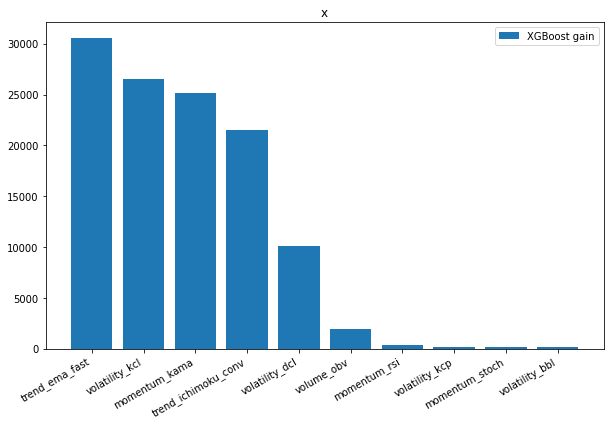

In [ ]:
from operator import itemgetter
importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
importances10 = dict(sorted(importances.items(), key = itemgetter(1), reverse = True)[:10])
plt.figure(figsize=(10,6))
plt.bar(*zip(*importances10.items()))
plt.xticks(rotation = 30, ha='right')
plt.title('x')
plt.legend(['XGBoost gain'])
#plt.savefig('./PRGS_XGBoost10.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
df_ASTE_strategy = df_ASTE_raw.copy()
df_ASTE_strategy[list(importances10.keys())] = df_ASTE_ta_all[list(importances10.keys())]
df_ASTE_strategy = df_ASTE_strategy.dropna().reset_index().drop('index',axis=1)
df_ASTE_strategy.to_feather('./df_CENX_XGBoost10.feather')


In [ ]:
# importancesCENX
# importancesGIFI
# importancesHOLX
# importancesIBOC
importancesNTRS
# importancesPRGS

{'trend_ema_fast': 59421.93932947285,
 'trend_ichimoku_conv': 50244.26695402665,
 'momentum_kama': 10601.498017088461,
 'volatility_kcl': 3441.7638193416665,
 'volume_nvi': 871.7841796666667,
 'volatility_dch': 718.9566759577777,
 'volume_obv': 652.3995940593076,
 'momentum_rsi': 518.9629145953846,
 'volatility_kcp': 396.55260607246584,
 'volume_fi': 362.77612282648647}

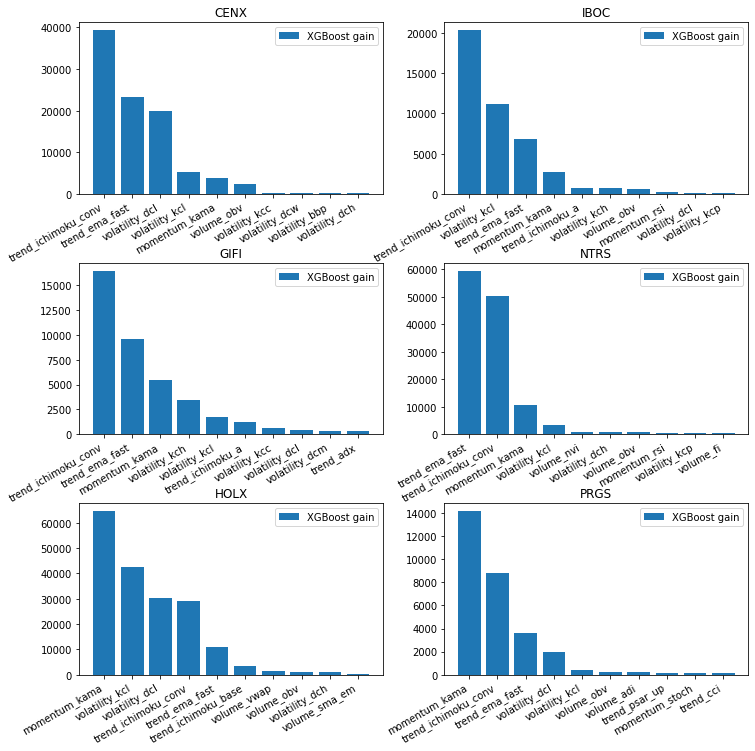

In [ ]:
# rows, cols = 3, 2

# fig, ax = plt.subplots(rows, cols,
#                         sharex='col',
#                         sharey='row')

# stocks = importancesCENX, importancesGIFI, importancesHOLX, importancesIBOC, importancesNTRS, importancesPRGS
# names = ['CENX', 'GIFI', 'HOLX', 'IBOC', 'NTRS', 'PRGS']

# for row in range(rows):
#   for col in range(cols):
#     for stock in stocks:
#       for name in names:
#         ax[row, col].bar(*zip(*stock.items()))
#         #ax[row, col].xticks(rotation = 30, ha='right')
#         ax[row, col].set(title=name)


fig, axs = plt.subplots(3,2)

axs[0,0].bar(*zip(*importancesCENX.items()))
axs[0,0].set(title  = 'CENX')
axs[0,0].set_xticklabels(importancesCENX.keys(), rotation=30, ha='right')
axs[0,0].legend(['XGBoost gain'])

axs[1,0].bar(*zip(*importancesGIFI.items()))
axs[1,0].set(title='GIFI')
axs[1,0].set_xticklabels(importancesGIFI.keys(), rotation=30, ha='right')
axs[1,0].legend(['XGBoost gain'])

axs[2,0].bar(*zip(*importancesHOLX.items()))
axs[2,0].set(title='HOLX')
axs[2,0].set_xticklabels(importancesHOLX.keys(), rotation=30, ha='right')
axs[2,0].legend(['XGBoost gain'])

axs[0,1].bar(*zip(*importancesIBOC.items()))
axs[0,1].set(title='IBOC')
axs[0,1].set_xticklabels(importancesIBOC.keys(), rotation=30, ha='right')
axs[0,1].legend(['XGBoost gain'])

axs[1,1].bar(*zip(*importancesNTRS.items()))
axs[1,1].set(title='NTRS')
axs[1,1].set_xticklabels(importancesNTRS.keys(), rotation=30, ha='right')
axs[1,1].legend(['XGBoost gain'])

axs[2,1].bar(*zip(*importancesPRGS.items()))
axs[2,1].set(title='PRGS')
axs[2,1].set_xticklabels(importancesPRGS.keys(), rotation=30, ha='right')
axs[2,1].legend(['XGBoost gain'])
fig.set_figheight(12)
fig.set_figwidth(12)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.savefig('./ALLSTOCK_XGBoost10.png', dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.show()

In [ ]:
#ASTE, CENX, GIFI, HOLX, IBOC, NTRS, PRGS

In [ ]:
df_ASTE_raw = pd.read_feather('stock_data/df_PRGS.feather')
df_ASTE_raw = df_ASTE_raw.drop(columns = ['permno','ticker','spret'])
df_ASTE_raw

,date,close,low,high,volume,ret,bid,ask,open,numtrd
0,20000103,54.3750,53.2500,57.500,112448,-0.041850,54.250,54.3750,57.000,253.0
1,20000104,50.5625,50.1250,54.000,194320,-0.070115,50.625,50.8750,53.625,355.0
2,20000105,48.2500,46.0000,51.000,189765,-0.045735,47.625,48.5000,51.000,377.0
3,20000106,46.6875,46.0000,47.500,92103,-0.032383,46.250,47.1250,47.500,274.0
4,20000107,52.0000,46.1250,52.250,105411,0.113788,52.000,52.0625,46.125,350.0
...,...,...,...,...,...,...,...,...,...,...
5530,20211227,48.7600,48.2594,48.855,155147,0.009106,48.760,48.8300,48.400,2934.0
5531,20211228,49.0500,48.4000,49.280,242517,0.005948,49.050,49.1000,48.710,3601.0
5532,20211229,49.1600,48.5500,49.290,182991,0.002243,49.100,49.1600,49.140,3489.0
5533,20211230,48.6600,48.6600,49.730,139738,-0.010171,48.660,48.7500,49.240,3465.0


In [ ]:
df = df_ASTE_raw.copy()
df_ASTE_ta_all = ta.add_all_ta_features(df, 'open', 'high', 'low', 'close', 'volume')#, fillna = True)
# df_ASTE_ta_all.dropna().reset_index().drop(columns = ['index'])
df_ASTE_ta_all.isna().sum().sort_values()

/usr/local/lib/python3.8/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.8/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


date                   0
volatility_bbli        0
volatility_kch         0
volatility_kcl         0
volatility_kcp         0
                    ... 
trend_mass_index      40
trend_trix            43
trend_stc             89
trend_psar_up       2741
trend_psar_down     2796
Length: 96, dtype: int64

In [ ]:
df_ASTE_ta_all = df_ASTE_ta_all.drop(columns = ['trend_psar_up', 'trend_psar_down'])
df_ASTE_ta_all = df_ASTE_ta_all.dropna().reset_index().drop(columns = ['index'])

In [ ]:
from sklearn.decomposition import PCA

dateclose = df_ASTE_ta_all[['date','close','open', 'high', 'low', 'volume', 'ret', 'bid', 'ask', 'numtrd']]
rest = df_ASTE_ta_all.drop(['date','close','open', 'high', 'low', 'volume', 'ret', 'bid', 'ask', 'numtrd'], axis=1)

n = 10

cols = np.array([])
for i in range(n):
  num = 'pca{}'.format(i)
  cols = np.append(cols,num)

pca = PCA(n_components=n)
principalComponents = pca.fit_transform(rest.values)
df_pca = pd.DataFrame(principalComponents, columns=cols)
dfPCA = dateclose.join(df_pca)
dfPCA.to_feather('./df_PRGS_PCA10.feather')

In [ ]:
df['close_lead'] = df['close'].shift(1)
df['ret_lead'] = df['ret'].shift(1)
df

,permno,date,ticker,close,low,high,volume,ret,bid,ask,...,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,close_lead,ret_lead
0,10107,2000-01-03,MSFT,116.56250,112.00000,118.62500,26937123,-0.001606,116.50000,116.56250,...,0.000000,0.000000,0.000000,0.000000,116.562500,109.431881,0.000000,0.000000,NaN,NaN
1,10107,2000-01-04,MSFT,112.62500,112.25000,117.12500,27531141,-0.033780,112.62500,112.68750,...,-0.216118,0.175627,0.035125,0.140501,114.579734,-3.378016,-3.436389,-3.378016,116.56250,-0.001606
2,10107,2000-01-05,MSFT,113.81250,109.37500,116.37500,32708345,0.010544,113.75000,113.81250,...,-0.275075,1.813398,0.390780,1.422618,114.229696,1.054384,1.048864,-2.359249,112.62500,-0.033780
3,10107,2000-01-06,MSFT,110.00000,108.37500,113.87500,27997348,-0.033498,109.93750,110.00000,...,-0.508164,1.704003,0.653424,1.050579,112.514984,-3.349808,-3.407199,-5.630027,113.81250,0.010544
4,10107,2000-01-07,MSFT,111.43750,107.31250,112.25000,31415665,0.013068,111.43750,111.50000,...,-0.547048,2.567089,1.036157,1.530932,112.111325,1.306818,1.298353,-4.396783,110.00000,-0.033498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,10107,2020-07-27,MSFT,203.85001,200.86000,203.97000,30118822,0.012668,203.78000,203.85001,...,-0.888783,-11.377633,-12.980354,1.602721,205.531361,1.266771,1.258815,74.884727,201.30000,-0.006122
3329,10107,2020-07-28,MSFT,202.02000,201.74001,204.70000,23223047,-0.008977,201.74001,201.88000,...,-1.054579,-14.013960,-13.187075,-0.826884,205.435330,-0.897724,-0.901778,73.314745,203.85001,0.012668
3330,10107,2020-07-29,MSFT,204.06000,202.00999,204.64999,19599491,0.010098,204.05000,204.09000,...,-1.091546,-16.940162,-13.937693,-3.002470,205.405169,1.009801,1.004737,75.064879,202.02000,-0.008977
3331,10107,2020-07-30,MSFT,203.89999,199.57001,204.46001,25050513,-0.000784,203.88000,203.89999,...,-1.113124,-18.070115,-14.764177,-3.305938,205.373278,-0.078413,-0.078444,74.927605,204.06000,0.010098


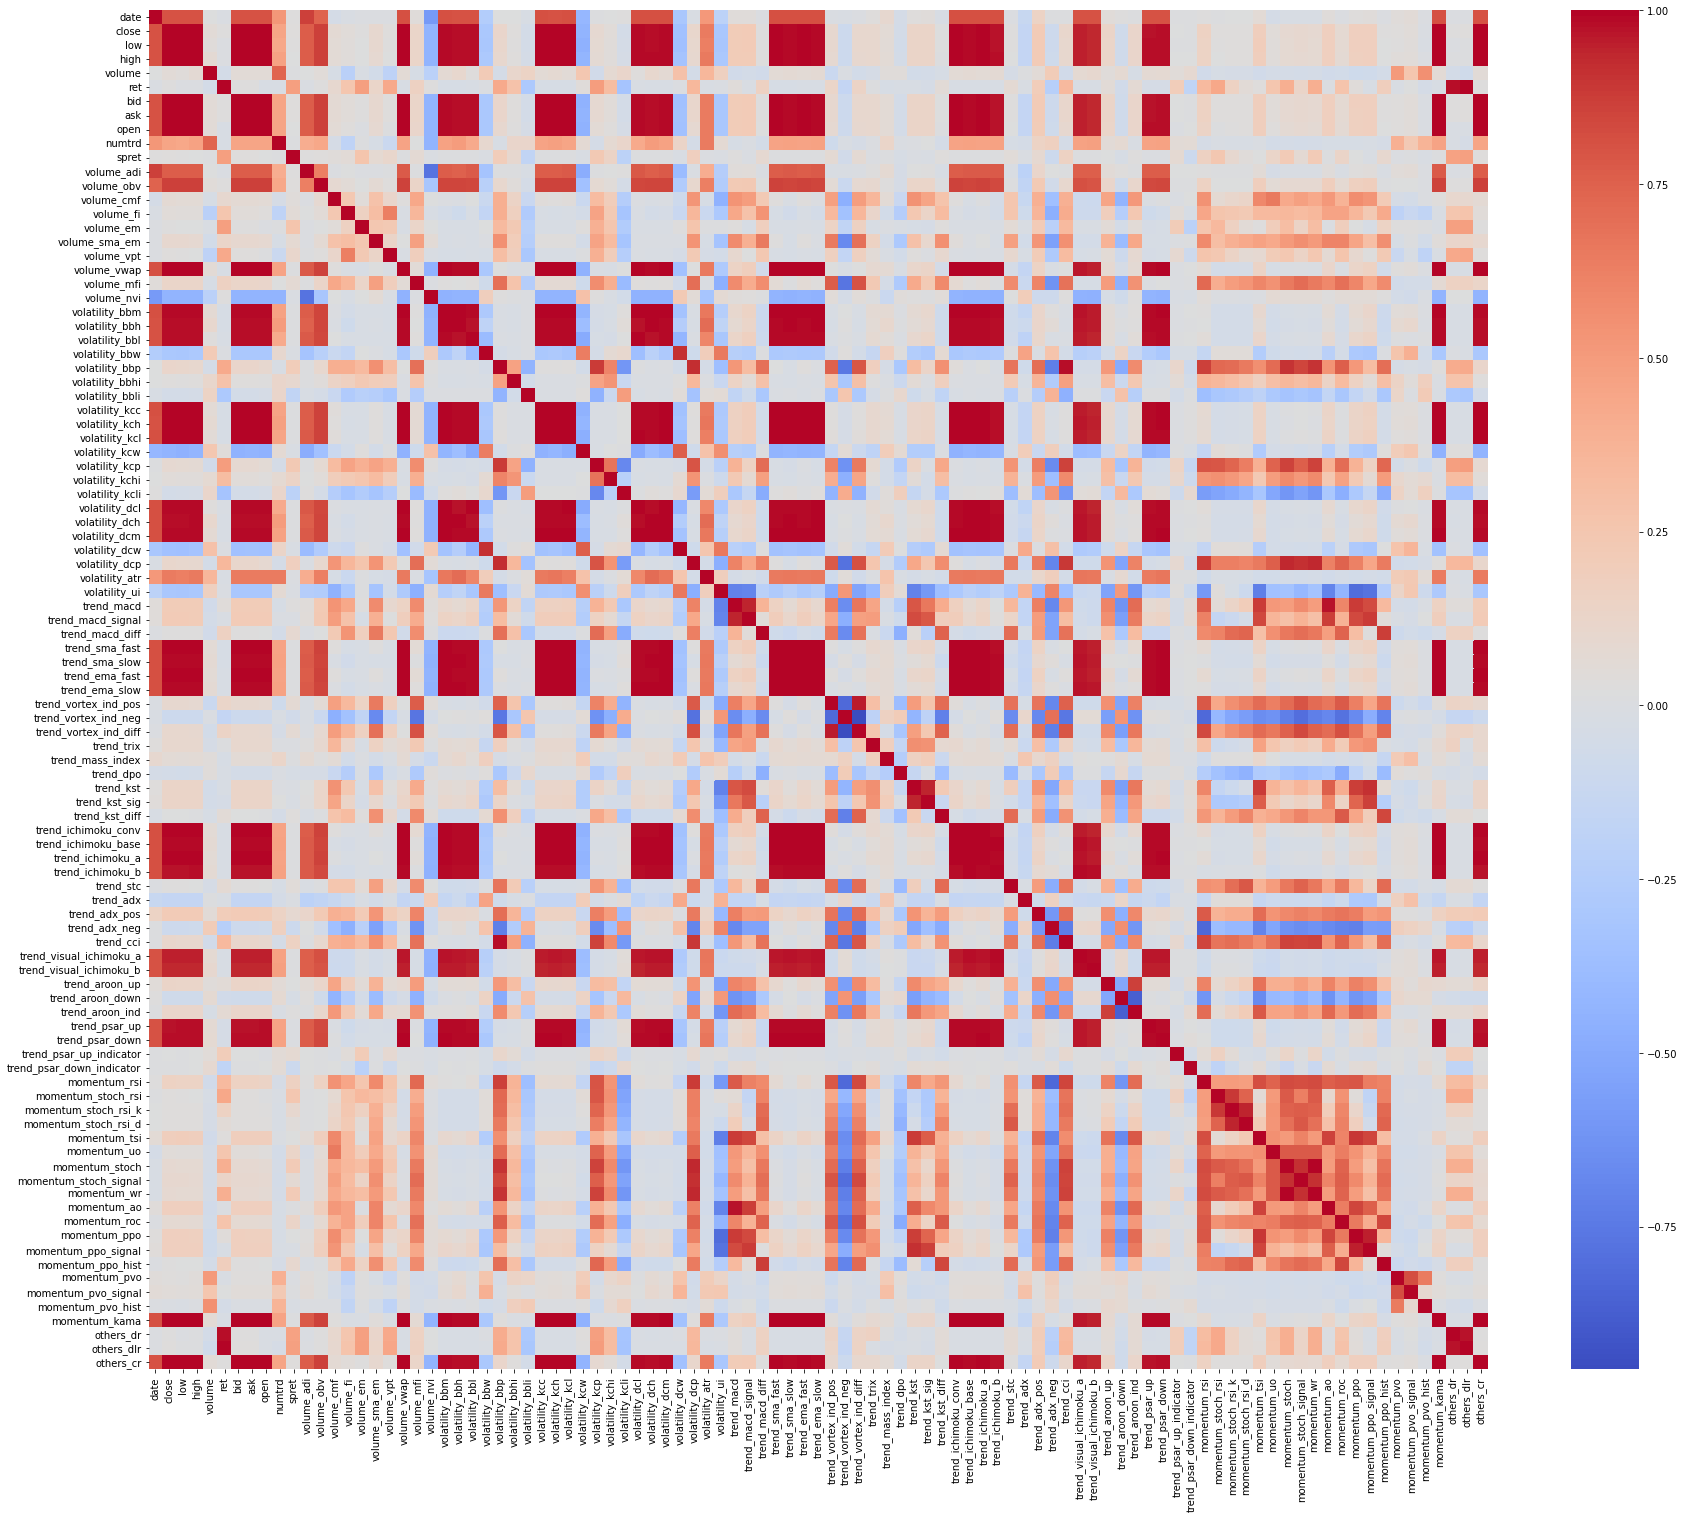

In [ ]:
#Correlation matrix of all features
plt.figure(figsize=(30,25))
cor = df_ASTE_ta_all.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['close'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.75]
relevant_features

date                       0.807094
close                      1.000000
low                        0.999146
high                       0.999211
bid                        0.999994
ask                        0.999960
open                       0.998473
volume_adi                 0.766625
volume_obv                 0.865613
volume_vwap                0.993516
volatility_bbm             0.988541
volatility_bbh             0.979723
volatility_bbl             0.982851
volatility_kcc             0.993968
volatility_kch             0.993483
volatility_kcl             0.993583
volatility_dcl             0.986122
volatility_dch             0.983319
volatility_dcm             0.989675
trend_sma_fast             0.993179
trend_sma_slow             0.985330
trend_ema_fast             0.995200
trend_ema_slow             0.989415
trend_ichimoku_conv        0.995161
trend_ichimoku_base        0.987079
trend_ichimoku_a           0.992715
trend_ichimoku_b           0.976019
trend_visual_ichimoku_a    0

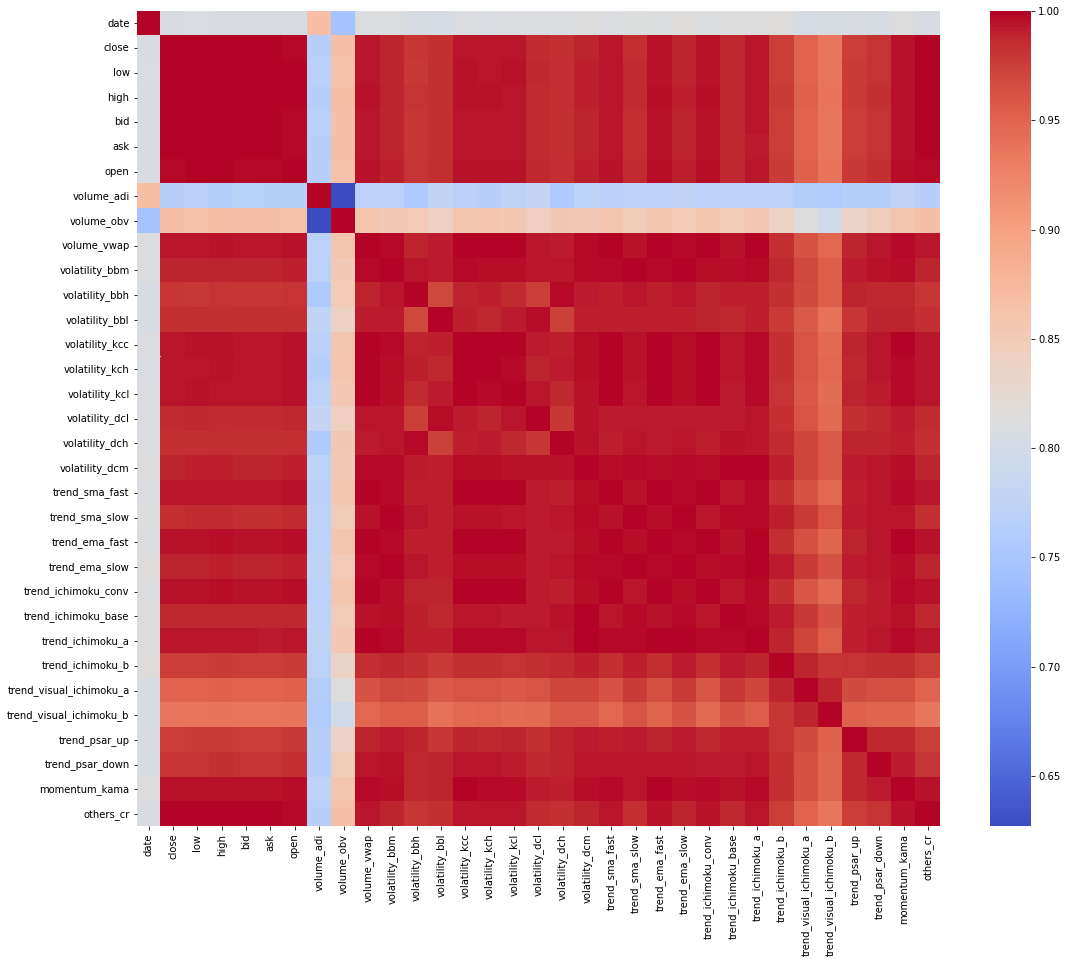

In [ ]:
#Correlation matrix of relevant features
plt.figure(figsize=(18,15))
relevant = df_ASTE_ta_all[relevant_features.index].corr()      #[relevant_features]
sns.heatmap(relevant, annot=False, cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
df_ASTE_ff_ta_all_cor02 = df_ASTE_ff_ta_all[relevant_features.index]
df_ASTE_ff_ta_all_cor02.to_feather('./df_ASTE_ff_ta_all_cor02.feather')
df_ASTE_ff_ta_all_cor02

,date,close,low,high,bid,ask,open,numtrd,RF,volume_adi,...,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_adx_pos,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_psar_up,trend_psar_down,momentum_kama,others_cr
0,20000103,17.5625,17.5000,19.1250,17.5000,17.5625,19.1250,209.0,0.00021,-2.032145e+05,...,18.31250,18.31250,18.31250,0.000000,34.061917,33.927711,16.750000,19.125000,17.562500,0.000000
1,20000104,16.7500,16.7500,17.5625,16.7500,16.8750,17.5625,182.0,0.00021,-5.344565e+05,...,17.93750,17.93750,17.93750,0.000000,34.061917,33.927711,16.750000,19.125000,17.248321,-4.626335
2,20000105,17.9375,16.7500,18.2500,17.8125,17.9375,16.8125,273.0,0.00021,-3.635188e+05,...,17.93750,17.93750,17.93750,0.000000,34.061917,33.927711,16.750000,19.125000,17.526995,2.135231
3,20000106,20.6250,17.8125,21.0000,20.7500,20.8750,18.2500,280.0,0.00021,-1.082156e+05,...,18.87500,18.87500,18.87500,0.000000,34.061917,33.927711,16.750000,19.125000,18.577501,17.437722
4,20000107,22.3750,20.7500,22.6875,22.3750,22.5625,21.0000,269.0,0.00021,-1.729442e+04,...,19.71875,19.71875,19.71875,0.000000,34.061917,33.927711,16.750000,19.125000,19.728651,27.402135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,20211227,70.0100,68.2475,70.1800,70.0100,70.1800,69.4900,1954.0,0.00000,1.600959e+07,...,64.70000,65.54375,62.64500,15.630423,65.355000,62.645000,62.739300,69.831614,67.159924,298.633452
5531,20211228,70.5100,69.7400,70.8800,70.3300,70.5200,70.2200,1931.0,0.00000,1.603009e+07,...,64.53000,65.63375,62.64500,17.070261,66.710000,62.645000,63.036928,69.831614,67.207215,301.480427
5532,20211229,69.9000,69.4550,70.9600,69.7700,69.9000,70.2200,2637.0,0.00000,1.600078e+07,...,64.57000,65.67375,62.64500,16.339527,67.375000,62.645000,63.507512,69.831614,67.255231,298.007117
5533,20211230,68.9000,68.5200,70.2200,68.9000,69.0300,70.0900,1360.0,0.00000,1.597741e+07,...,64.57000,65.67375,62.64500,15.530785,66.870000,62.645000,64.103711,69.831614,67.266602,292.313167


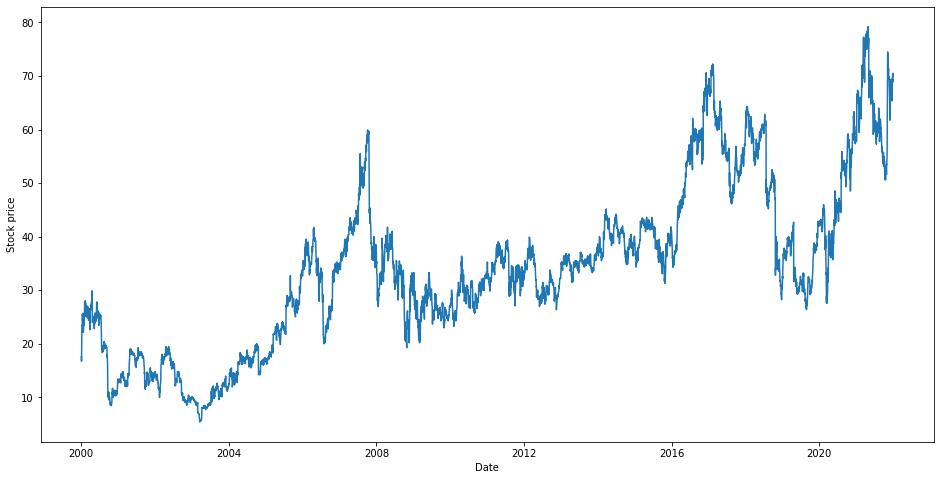

In [ ]:
plotdata = df_ASTE_ff_ta_all_cor02[['date','close']]
datetime_series = pd.to_datetime(plotdata['date'].astype(str), format='%Y%m%d')
datetime_index = pd.DatetimeIndex(datetime_series.values)
plotdata = plotdata.set_index(datetime_index)
plotdata = plotdata.sort_values(by='date')
plotdata = plotdata.drop(columns='date')
plotdata
plt.figure(figsize=(16, 8))
plt.plot(plotdata)
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

dateclose = df_ASTE_ff_ta_all_cor02[['date','close']]
rest = df_ASTE_ff_ta_all_cor02.drop(['date','close'], axis=1)

n = 5

cols = np.array([])
for i in range(n):
  num = 'pca{}'.format(i)
  cols = np.append(cols,num)

pca = PCA(n_components=n)
principalComponents = pca.fit_transform(rest.values)
df_pca = pd.DataFrame(principalComponents, columns=cols)
dfPCA = dateclose.join(df_pca)
dfPCA.to_feather('./df_ASTE_ff_ta_all_cor02_PCA5.feather')

In [ ]:
df_talib = df_MSFT[['date','close','high','low','open','volume']]
df_MSFT2 = df.copy()
talib_dict = talib.get_function_groups()
for group in talib_dict:
  for function in talib_dict[group]:
    if function == 'MAVP':
      continue
    f = getattr(talib.abstract, function)
    ta_out = f(df_talib)
    if isinstance(ta_out,pd.DataFrame):
      df_MSFT2[ta_out.columns] = ta_out
    else:
      df_MSFT2[function] = ta_out
  print(group, ' finished')

Cycle Indicators  finished
Math Operators  finished
Math Transform  finished
Momentum Indicators  finished
Overlap Studies  finished
Pattern Recognition  finished
Price Transform  finished
Statistic Functions  finished
Volatility Indicators  finished
Volume Indicators  finished


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [ ]:
#only if without ta
#df_MSFT2['close_lead'] = df_MSFT2['close'].shift(1)

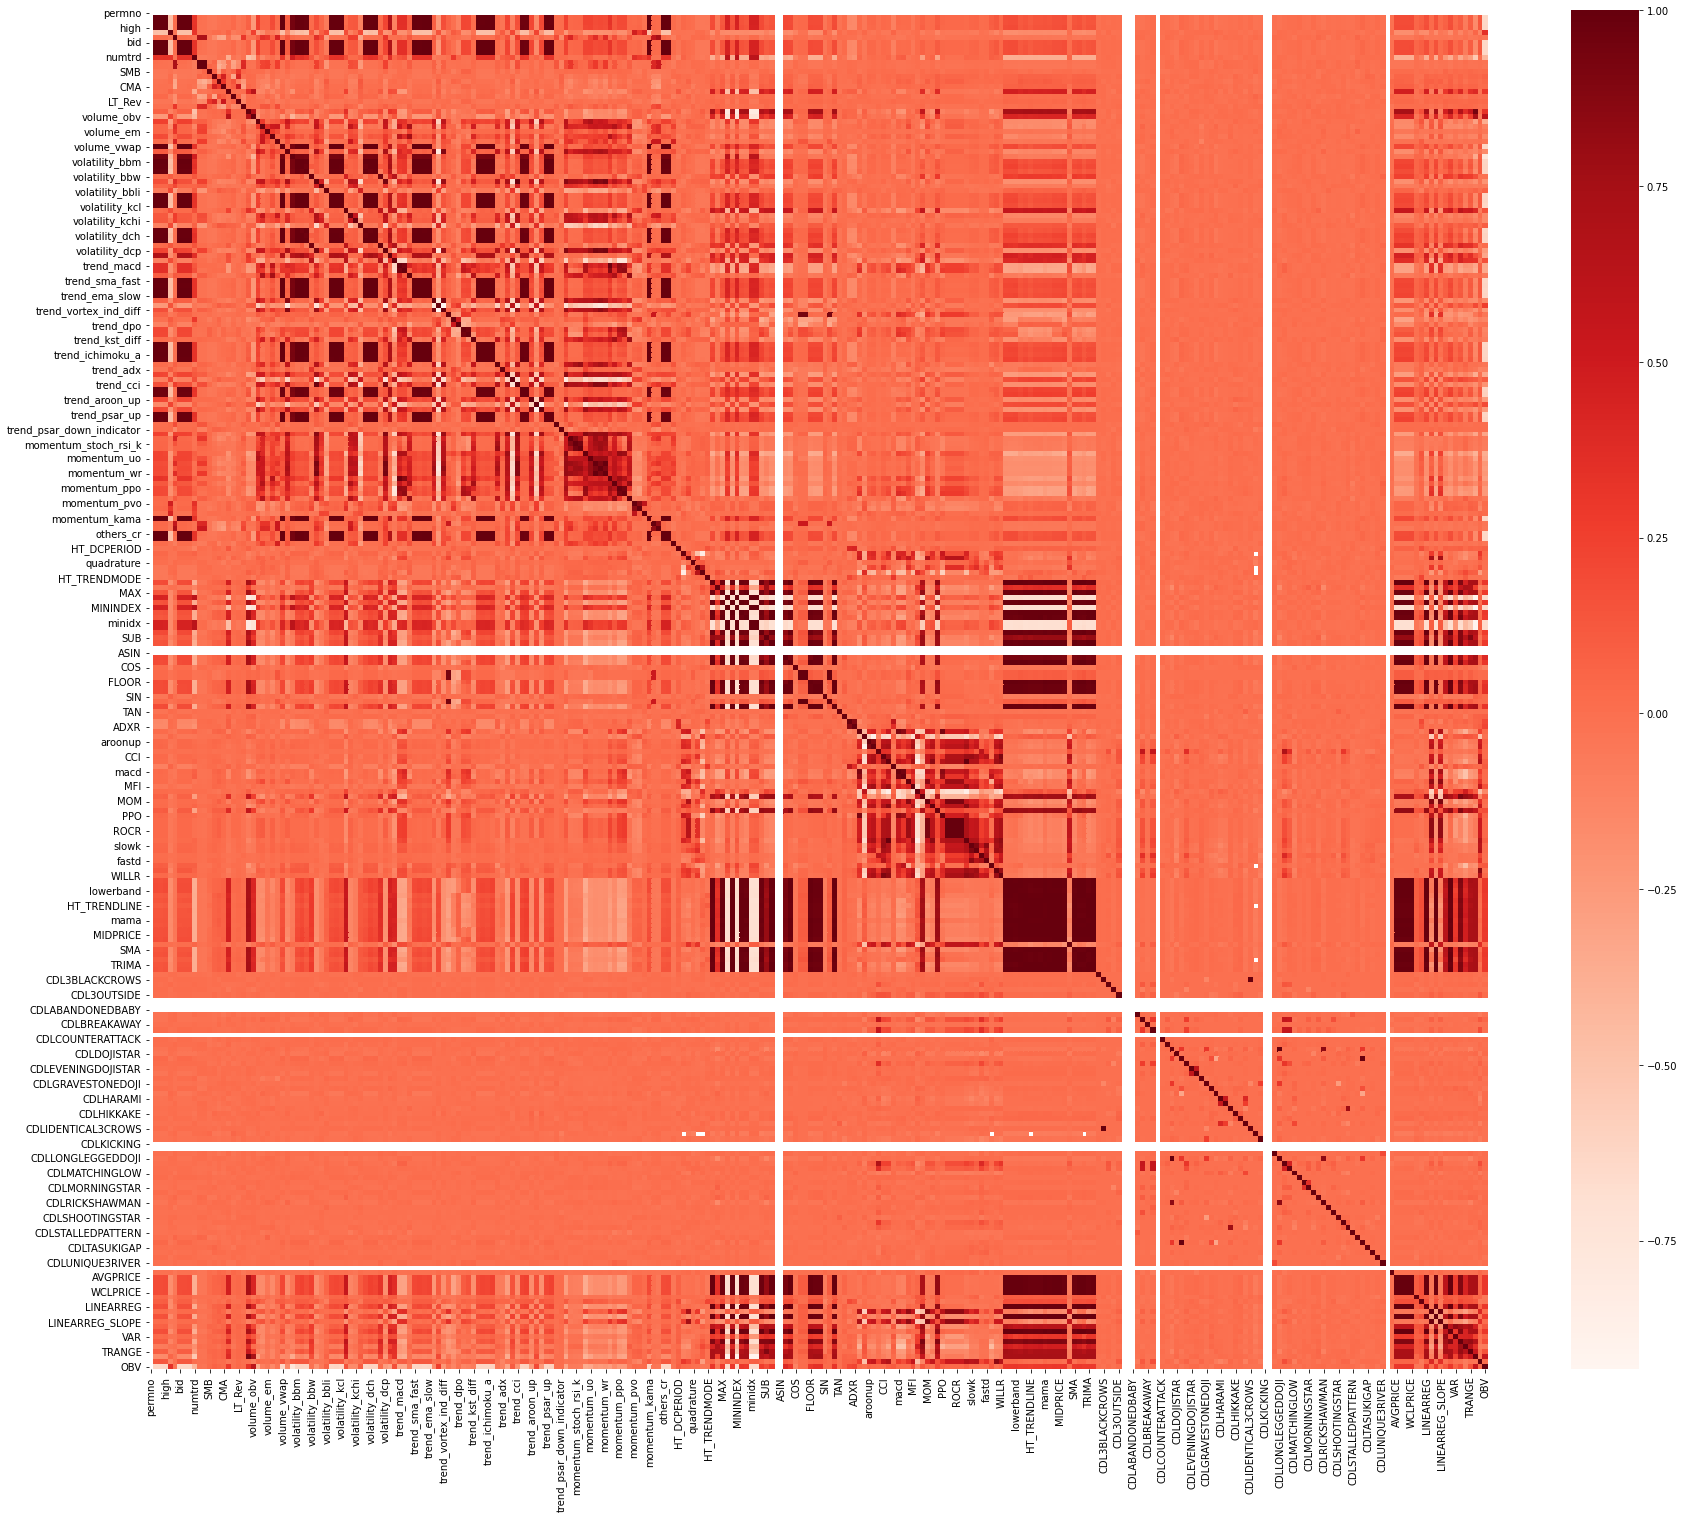

In [ ]:
plt.figure(figsize=(30,25))
cor = df_MSFT2.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['close_lead'])

#Selecting highly correlated features
# cor_target[~cor_target.isnull()].sort_values()
relevant_features = cor_target[cor_target>0.001]
relevant_features.sort_values()

permno         NaN
close     0.998749
low       0.998990
high      0.999093
volume    0.478054
ret       0.008599
bid       0.998749
ask       0.998750
open      0.999264
numtrd    0.331821
spret     0.019726
Mkt-RF    0.022284
SMB       0.034487
HML       0.036620
RMW       0.004434
CMA       0.010647
RF        0.003271
Mom       0.035469
LT_Rev    0.029015
ST_Rev    0.014837
Name: close_lead, dtype: float64


CDLRISEFALL3METHODS        0.001502
BOP                        0.001769
CDLLONGLINE                0.001823
trend_psar_up_indicator    0.001936
CDLLADDERBOTTOM            0.002035
                             ...   
ask                        0.998750
low                        0.998990
high                       0.999093
open                       0.999264
close_lead                 1.000000
Name: close_lead, Length: 262, dtype: float64

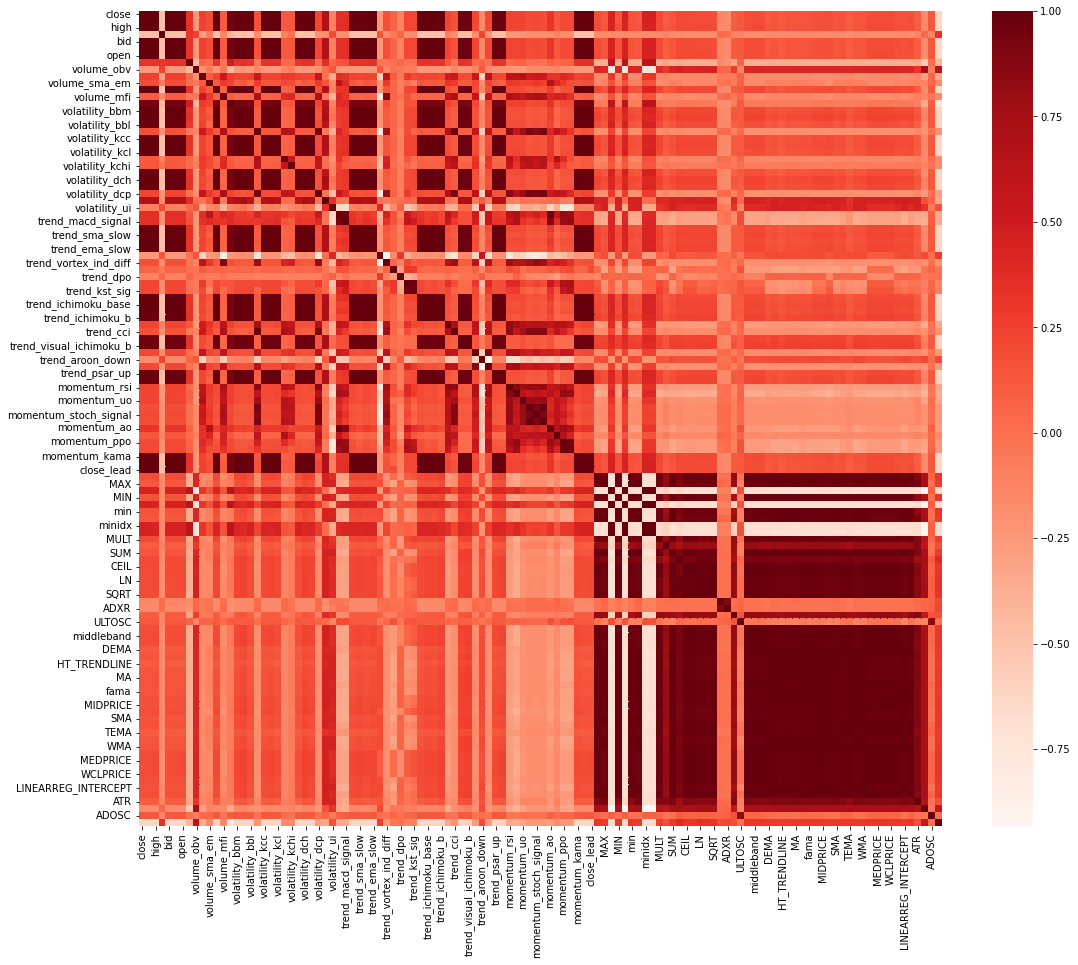

In [ ]:
#Correlation matrix of relevant features
plt.figure(figsize=(18,15))
relevant = df_MSFT2[relevant_features.index].corr()
sns.heatmap(relevant, annot=False, cmap=plt.cm.Reds)
plt.show()

In [ ]:
df_MSFT_tatalib = df_MSFT2[relevant_features.index].drop('close_lead', axis=1)
df_MSFT_tatalib

,close,low,high,bid,ask,open,volume_vwap,volume_nvi,volatility_bbm,volatility_bbh,...,TRIMA,WMA,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE,LINEARREG,LINEARREG_INTERCEPT,TSF,ATR
0,116.56250,112.00000,118.62500,116.50000,116.56250,117.37500,115.729167,1000.000000,116.562500,116.562500,...,NaN,NaN,116.140625,115.312500,115.729167,115.937500,NaN,NaN,NaN,NaN
1,112.62500,112.25000,117.12500,112.62500,112.68750,113.56250,114.855154,1000.000000,114.593750,118.531250,...,NaN,NaN,113.890625,114.687500,114.000000,113.656250,NaN,NaN,NaN,NaN
2,113.81250,109.37500,116.37500,113.75000,113.81250,111.12500,114.229457,1000.000000,114.333333,117.631586,...,NaN,NaN,112.671875,112.875000,113.187500,113.343750,NaN,NaN,NaN,NaN
3,110.00000,108.37500,113.87500,109.93750,110.00000,112.18750,113.383644,966.501922,113.250000,117.966162,...,NaN,NaN,111.109375,111.125000,110.750000,110.562500,NaN,NaN,NaN,NaN
4,111.43750,107.31250,112.25000,111.43750,111.50000,108.62500,112.729931,966.501922,112.887500,117.348021,...,NaN,NaN,109.906250,109.781250,110.333333,110.609375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,342.45001,335.42999,342.48001,342.35001,342.45001,335.45999,331.073731,8994.072870,331.507500,343.770003,...,300.096873,299.531524,299.209725,299.216950,299.331300,299.388475,298.359138,299.986570,298.233951,4.613481
5466,341.25000,340.32001,343.81000,341.25000,341.28000,343.14999,331.291365,8962.555927,331.738500,344.540484,...,300.139289,299.560213,298.577500,298.364990,298.693330,298.857500,298.685715,299.404279,298.630441,4.488946
5467,341.95001,339.67999,344.29999,341.95001,341.95999,341.29999,331.540514,8980.940920,332.306501,345.841325,...,300.105414,299.234192,294.931228,294.707445,294.528300,294.438728,297.594289,299.637137,297.437146,4.625816
5468,339.32001,338.82001,343.13000,339.32001,339.37000,341.91000,331.767777,8980.940920,332.768502,346.595435,...,299.967581,298.218235,286.711250,286.765000,285.683330,285.142495,293.940285,300.906855,293.404395,5.111115


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df_MSFT_tatalib.values
norm = scaler.fit_transform(x)
df_norm_tatalib = pd.DataFrame(norm)
df_norm_tatalib['close_lead'] = df_MSFT2['close_lead']
df_norm_tatalib

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,close_lead
0,0.830557,0.777063,0.845465,0.829738,0.830318,0.844478,0.833041,-0.316264,0.850919,0.757541,...,NaN,0.979515,0.964999,0.972129,0.975686,NaN,NaN,NaN,NaN,NaN
1,0.767751,0.781092,0.821742,0.767924,0.768517,0.783619,0.818919,-0.316264,0.818983,0.787988,...,NaN,0.939384,0.953850,0.941288,0.935004,NaN,NaN,NaN,NaN,116.56250
2,0.786693,0.734760,0.809881,0.785870,0.786459,0.744709,0.808809,-0.316264,0.814758,0.774075,...,NaN,0.917646,0.921516,0.926797,0.929431,NaN,NaN,NaN,NaN,112.62500
3,0.725880,0.718645,0.770343,0.725053,0.725655,0.761670,0.795143,-0.335480,0.797185,0.779249,...,NaN,0.889778,0.890297,0.883323,0.879833,NaN,NaN,NaN,NaN,113.81250
4,0.748809,0.701522,0.744643,0.748981,0.749578,0.704801,0.784580,-0.335480,0.791304,0.769689,...,NaN,0.868319,0.866325,0.875892,0.880669,NaN,NaN,NaN,NaN,110.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,4.433638,4.377698,4.385782,4.432497,4.432921,4.325791,4.312531,4.269444,4.337688,4.271377,...,4.325503,4.244719,4.245739,4.246735,4.247207,4.225399,4.351245,4.214526,2.181026,334.69000
5466,4.414496,4.456502,4.406816,4.414950,4.414261,4.448548,4.316048,4.251365,4.341435,4.283292,...,4.326023,4.233442,4.230540,4.235356,4.237738,4.231215,4.340658,4.221575,2.095319,342.45001
5467,4.425662,4.446188,4.414565,4.426116,4.425106,4.419016,4.320073,4.261911,4.350649,4.303410,...,4.320120,4.168408,4.165292,4.161072,4.158937,4.211776,4.344892,4.200362,2.189516,341.25000
5468,4.383712,4.432329,4.396062,4.384163,4.383799,4.428753,4.323745,4.261911,4.358144,4.315073,...,4.301723,4.021797,4.023604,4.003319,3.993156,4.146696,4.367978,4.128673,2.523512,341.95001


In [ ]:
x_train, x_test, y_train, y_test = split_train_test(df_norm_tatalib, target='close_lead')

In [ ]:
#Correlation with output variable
cor_target = abs(cor['ret_lead'])
#Selecting highly correlated features
# cor_target[~cor_target.isnull()].sort_values()
relevant_features = cor_target[cor_target>0.05].sort_values() #much lower target
relevant_features

momentum_ao                  0.051602
trend_macd                   0.068201
momentum_ppo                 0.077895
spret                        0.079639
others_dlr                   0.083136
ret                          0.083200
others_dr                    0.084846
trend_aroon_up               0.085647
trend_psar_down_indicator    0.087953
momentum_tsi                 0.088344
trend_aroon_down             0.094803
trend_psar_up_indicator      0.099479
trend_aroon_ind              0.101475
volume_cmf                   0.104079
trend_kst_diff               0.110190
volume_sma_em                0.111007
volume_em                    0.135280
momentum_stoch_rsi_d         0.136914
trend_stc                    0.136996
volatility_bbhi              0.167577
volatility_bbli              0.170875
volume_mfi                   0.188461
trend_vortex_ind_neg         0.204698
trend_macd_diff              0.204730
trend_vortex_ind_pos         0.209369
trend_vortex_ind_diff        0.217256
momentum_uo 

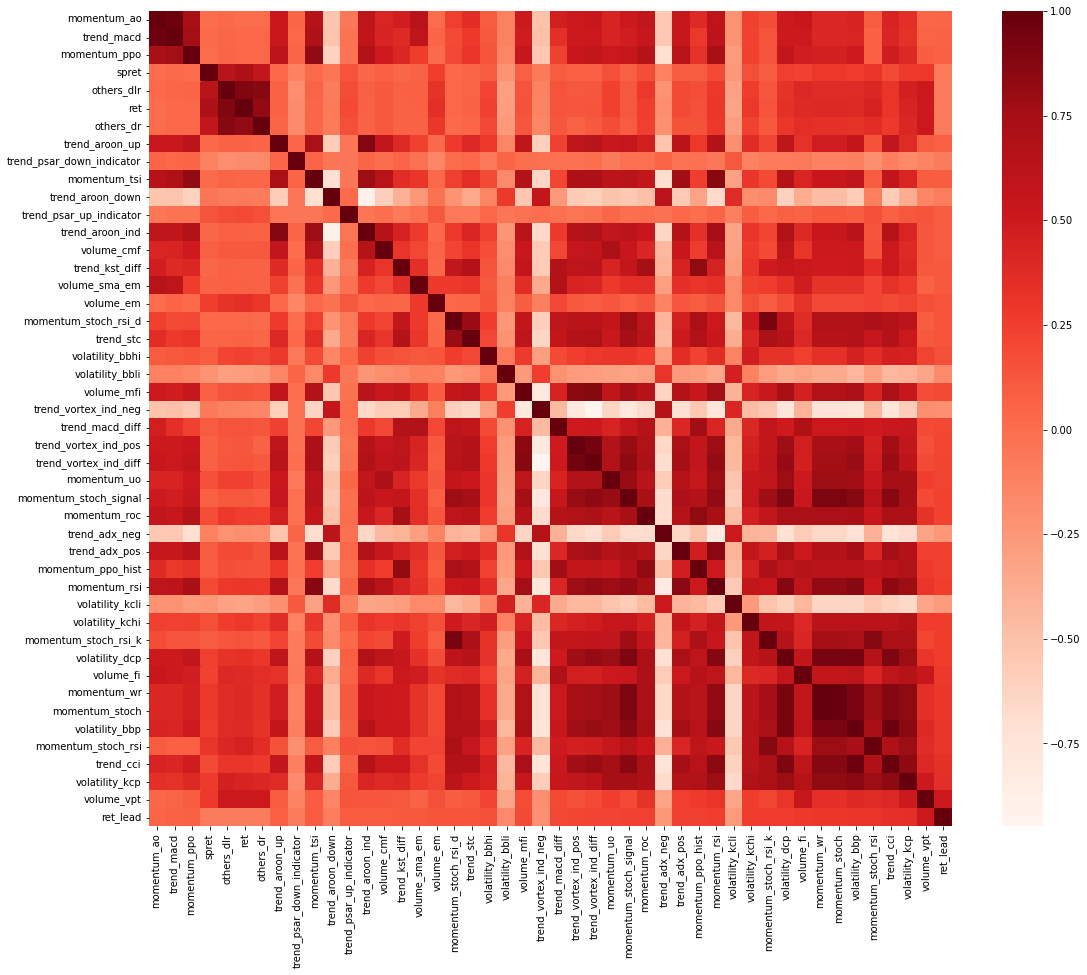

In [ ]:
#Correlation matrix of relevant features
plt.figure(figsize=(18,15))
relevant = df_MSFT2[relevant_features.index].corr()
sns.heatmap(relevant, annot=False, cmap=plt.cm.Reds)
plt.show()